In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np


df = pd.read_csv('diabetes.csv')
df.head()

# We want to predict whether or not the people in this dataset have Diabetes (1) or not (0) based on the Outcome Column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# Preliminary info on dataset
df.shape

(768, 9)

In [44]:
# Split dataset into training and testing sets
X, y = df.drop(columns='Outcome'), df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

In [45]:
# Defining Parameter Grid Dictionary for hyper parameter tuning
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  

# Create a SVM Classifier for the grid search
SVM_model = svm.SVC() 


# Prep for grid search:
# GridSearchCV searches over parameter grid and takes the best values (refit = True)

grid = GridSearchCV(SVM_model, param_grid, refit = True)
  
# Fit the Grid search model
grid_search = grid.fit(X_train, y_train)


# Get the best parameters from the Grid Seach
C_value = grid_search.best_params_['C']
Gamma = grid_search.best_params_['gamma']
Kernel = grid_search.best_params_['kernel']

# Print Best Parameters from Grid Search
print(f'The Best Parameters from the Grid Search: {grid.best_params_}')

The Best Parameters from the Grid Search: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [46]:
# Use the best values from the Grid_Search as parameters for your SVM Classifier 
# Fit SVM Classifier with your data

SVM_model = svm.SVC(C = C_value, kernel = Kernel, gamma = Gamma).fit(X_train, y_train)


# Use SVM_model to create predictions
y_prediction = SVM_model.predict(X_test)


# Create Confusion Matrix comparing the predictions to actual results
cm = confusion_matrix(y_test, y_prediction)

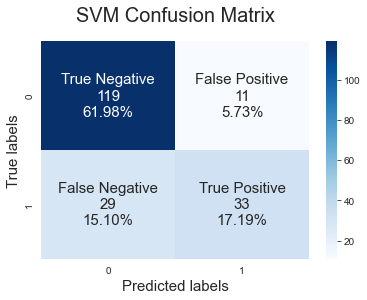

In [47]:
# Create labels for the Confusion Matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('SVM Confusion Matrix', pad = 20,fontsize=20);